In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matplotlib Version : 3.4.3
Seaborn Version : 0.11.2
/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


# Coloumn Description

* **Suburb** - Suburb

* **Address** - Address

* **Rooms** - Number of rooms

* **Price** - Price in Australian dollars

**Method** - 
    
    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.

**Type** -

    br - bedroom(s);
    h - house,cottage,villa, semi,terrace;
    u - unit, duplex;
    t - townhouse;
    dev site - development site;
    o res - other residential.

* **SellerG** - Real Estate Agent

* **Date** - Date sold

* **Distance** - Distance from CBD in Kilometres

* **Regionname** - General Region (West, North West, North, North east …etc)

* **Propertycount** - Number of properties that exist in the suburb.

* **Bedroom2** - Scraped # of Bedrooms (from different source)

* **Bathroom** - Number of Bathrooms

* **Car** - Number of carspots

* **Landsize** - Land Size in Metres

* **BuildingArea** - Building Size in Metres

* **YearBuilt** - Year the house was built

* **CouncilArea** - Governing council for the area

* **Lattitude** - Self explanitory

* **Longtitude** - Self explanitory

# 1. Understand the dataset

* **Number of rows/entries** - 34857 entries, 0 to 34856

* **Data columns** (total 21 columns):

*   **Numerical** (13 columns)
 *    float64 (12 columns) - 
    'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
    'Propertycount'

 *    int64 (1 column) - 'Rooms'

* **Nominal/Categorical** (8 columns)
 *     object (8 columns) - 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'
 
 
Price, Distance, Landsize, BuildingArea, YearBuilt, Rooms

In [2]:
df = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
cat_cols = df.select_dtypes(include = ['object'])
cat_cols

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan
34853,Yarraville,29A Murray St,h,SP,Sweeney,24/02/2018,Maribyrnong City Council,Western Metropolitan
34854,Yarraville,147A Severn St,t,S,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,24/02/2018,Maribyrnong City Council,Western Metropolitan


In [5]:
num_cols = df.select_dtypes(exclude = ['object'])
num_cols

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.81140,145.01160,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,6543.0
34855,3,1140000.0,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


In [6]:
# Statistical Summary
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


# Empty values

There are not many empty values in **cat_cols**, but there are a lot of empty values in **num_cols**.

In [7]:
print(cat_cols.isnull().sum())
print("")
print(cat_cols.isnull().sum()/len(df))

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

Suburb         0.000000
Address        0.000000
Type           0.000000
Method         0.000000
SellerG        0.000000
Date           0.000000
CouncilArea    0.000086
Regionname     0.000086
dtype: float64


In [8]:
print(num_cols.isnull().sum())
print("")
print(num_cols.isnull().sum()/len(df))

Rooms                0
Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
Lattitude         7976
Longtitude        7976
Propertycount        3
dtype: int64

Rooms            0.000000
Price            0.218321
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
Lattitude        0.228821
Longtitude       0.228821
Propertycount    0.000086
dtype: float64


In [9]:
# Drop BuildingArea and YearBuilt as there are too many empty values in both columns



# Visualisation

Set dpi (Dots per Inch) as the default resolution of matplotlib is low

In [10]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [28]:
num_bath = num_cols['Bathroom'].convert_dtypes(int)
num_bath = set(num_bath) # remove duplicates and sort and leave unique/distinct values only
num_bath = list(num_bath) # convert to a list
num_bath

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, <NA>]

In [67]:
selected_num_cols = num_cols[['Price', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Rooms']]

selected_num_cols.dropna(axis = 0, subset=['Price'], inplace = True)
selected_num_cols.drop(columns=['YearBuilt', 'BuildingArea'], inplace = True)

print(selected_num_cols.isnull().sum())
print('')
print(selected_num_cols.isnull().sum()/len(df))
print(len(selected_num_cols)) #27247

Price          0
Distance       1
Landsize    9265
Rooms          0
dtype: int64

Price       0.000000
Distance    0.000029
Landsize    0.265800
Rooms       0.000000
dtype: float64
27247


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
selected_num_cols

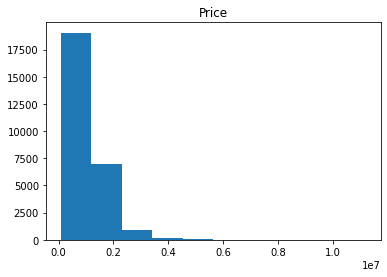

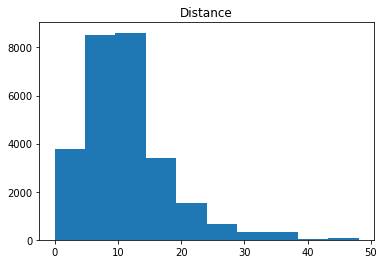

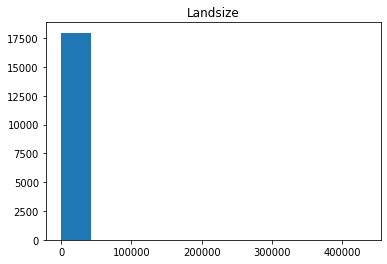

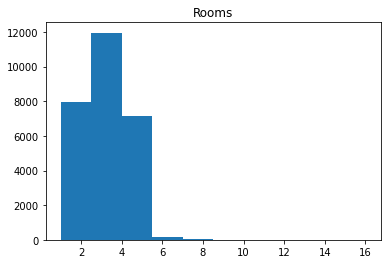

In [66]:
for i in selected_num_cols:
    plt.hist(selected_num_cols[i])
    plt.title(i)
    plt.show()

             Price  Distance  Landsize     Rooms
Price     1.000000 -0.211384  0.032748  0.465238
Distance -0.211384  1.000000  0.055257  0.284298
Landsize  0.032748  0.055257  1.000000  0.034255
Rooms     0.465238  0.284298  0.034255  1.000000


<AxesSubplot:>

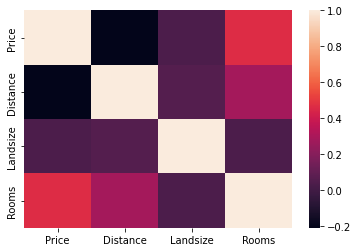

In [68]:
# Correlation
num_corr = selected_num_cols.corr()
# print(num_corr[selected_num_cols>0.5])
print(num_corr)
sns.heatmap(num_corr)